# Simple Example of Expectation Maximization Algorithm on Gaussian Mixture Model

### The expectation maximization algorithm is an interative algorithm that searches for the maximum likelihood estimate of unknown parameters. It is generally used when there are unobserved random variables (ie. missing information).

### For example, imagine flipping a biased coin (you don't know the bias!), and sampling from one distribution (G1) when you get heads, and sampling from another (G2) when you get tails. You get hungry so you leave to grab a snack and when you get back to your desk, someone has stolen the paper on which you wrote down which samples were samples from G1 and which were from G2. 

### Here, the missing information is what distribution (G1 or G2) each sample was taken from. Even without this information, can we still estimate the mean $(\mu)$ and variance $(\sigma^2)$ of G1 and G2? 

### The answer is yes with the help of the EM algorithm!

## Import some useful things

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt

## Set some parameters

In [5]:
# Set Pi, the probability of sampling from G1
Pi = 0.3

# Set [mean, variance] of two gaussians, G1 and G2.
G1 = [0,7]
G2 = [15,2]


In [6]:
def cointoss(p):
    if np.random.random() > p:
        return 0
    else:
        return 1

def sample(pi, gaus1, gaus2):
    if cointoss(pi):
        return np.random.normal(loc=gaus1[0], scale=gaus1[1])
    else:
        return np.random.normal(loc=gaus2[0], scale=gaus2[1])

## Sample Gaussian Mixture

In [18]:
# Sample from the two gaussians

X = []
for i in range(1000):
    X.append(sample(Pi, G1, G2))

/Users/wooyoung/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


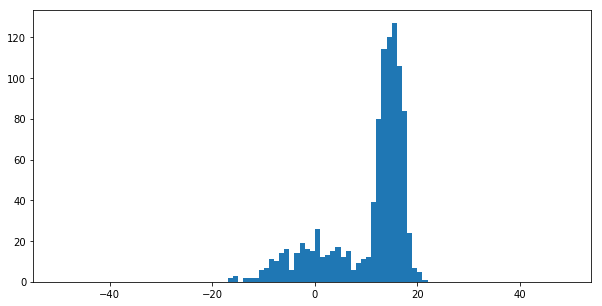

In [19]:
# Plot the sampled data
f = plt.figure(figsize=(10,5))
plt.hist(X, bins=np.arange(-50,50,1))
f.show()

# Initialize estimated parameters

In [116]:
pi = 0.5


(mu1, sig1) = (5,5)
(mu2, sig2) = (10,10)

Y = [cointoss(pi) for x in range(5000)]

## Define some functions

In [109]:
def Prob_x(x, mu, sigma):
    return scipy.stats.norm.pdf(x, loc=mu, scale=sigma)

def Prob_X(X, mu, sigma):
    return np.prod([Prob_x(x,mu,sigma) for x in X])

In [110]:
def prob_z(x, z, pi, gaus1, gaus2):
    mu1,sig1 = gaus1
    mu2,sig2 = gaus2
    if z==0:
        return (pi* Prob_x(x, mu1, sig1))/((pi* Prob_x(x, mu1, sig1)) + ((1-pi)*Prob_x(x,mu2,sig2)))
    else:
        return ((1-pi)*Prob_x(x,mu2,sig2))/((pi* Prob_x(x, mu1, sig1)) + ((1-pi)*Prob_x(x,mu2,sig2)))
    

## Update fraction pi
## $\pi_{z, n+1} = \frac{P(z|x_i, \theta_n)}{\sum_{z'}{\sum_{i}{P(z'|x_i, \theta_n)}}}$

In [111]:
def update_pi(pi, X, gaus1, gaus2):
    mu1,sig1 = gaus1
    mu2,sig2 = gaus2
    summed_pz1 = np.sum([prob_z(x,1,pi, gaus1, gaus2) for x in X])
    summed_pz0 = np.sum([prob_z(x,0,pi, gaus1, gaus2) for x in X])
    return summed_pz0 / (summed_pz1 + summed_pz0)

## Update mean
## $\mu_{z, n+1} = \frac{\sum_i{P(z|x_i, \theta_n)x_i}}{\sum_i{z|x_i, \theta_n}}$

In [112]:
def update_mu(X, z, pi, gaus1, gaus2):
    numerator = np.sum([prob_z(x, z, pi, gaus1, gaus2)*x for x in X])
    denom = np.sum([prob_z(x, z, pi, gaus1, gaus2) for x in X])
    return numerator/denom

## Update variance
## $\sigma^2_{z, n+1} = \frac{\sum_i{P(z|x_i, \theta_n)(x_i - \mu_{z, n+1})^2}}{\sum_i{P(z|x_i, \theta_n)}}$

In [113]:
def update_std(X, z, pi, gaus1, gaus2):
    if z==0:
        mu = gaus1[0]
    else:
        mu = gaus2[0]
    numerator = np.sum([prob_z(x, z, pi, gaus1, gaus2)*((x-mu)**2) for x in X])
    denom = np.sum([prob_z(x, z, pi, gaus1, gaus2) for x in X])
    return np.sqrt(numerator/denom)

# Iterate updates

In [118]:
for i in range(20):
    new_pi = update_pi(pi, X, (mu1, sig1), (mu2, sig2))
    
    new_mu1 = update_mu(X, 0, pi, (mu1, sig1), (mu2, sig2))
    new_mu2 = update_mu(X, 1, pi, (mu1, sig1), (mu2, sig2))
    
    new_sig1 = update_std(X, 0, pi, (new_mu1,sig1), (new_mu2,sig2))
    new_sig2 = update_std(X, 1, pi, (new_mu1,sig1), (new_mu2,sig2))
    
    print(new_pi)
    print((new_mu1, new_sig1))
    print((new_mu2, new_sig2))
    print("\n")
    
    pi = new_pi
    mu1 = new_mu1
    mu2 = new_mu2
    sig1 = new_sig1
    sig2 = new_sig2

0.694114618831
(14.915935157745055, 2.0172755733125021)
(0.83342582416375732, 8.0396317728963211)


0.699648525632
(14.90910524259316, 2.0294450579101118)
(0.58986865748023376, 7.9140761484051332)


0.703541476428
(14.903559523202521, 2.038035535359489)
(0.41499616865479488, 7.8211856702696103)


0.706270002766
(14.899252983829118, 2.0440952436169906)
(0.29076354860157988, 7.7538453581676468)


0.708174921256
(14.896018234153958, 2.0483567216227141)
(0.20325491790329284, 7.7057579563434686)


0.709500179381
(14.893648104573739, 2.0513416049124076)
(0.14201530488293759, 7.6717929783718199)


0.710419526065
(14.891942846468091, 2.0534240333512317)
(0.099365965072608947, 7.6479898559606054)


0.711055877281
(14.890731994736822, 2.0548718746888541)
(0.069767539709857773, 7.6314001222213346)


0.711495620597
(14.889880240431381, 2.0558757460044856)
(0.049277727350206003, 7.619882363509662)


0.711799137205
(14.889285046879452, 2.0565703312989747)
(0.035118466896724598, 7.6119073746718016)

